<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 205.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 210.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 118.8 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [4]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


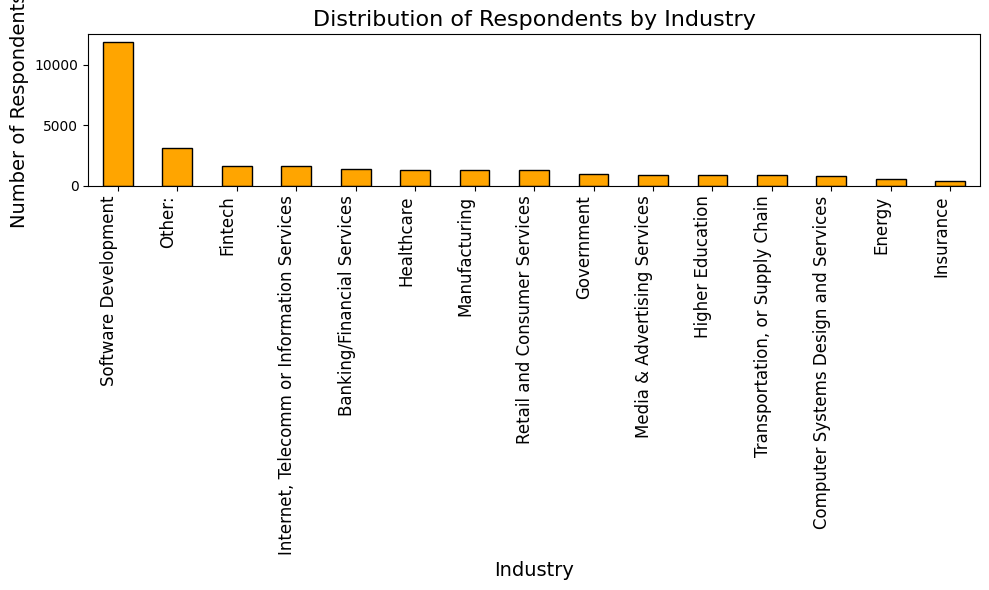

In [8]:
##Write your code here

industry_counts = df['Industry'].value_counts()

plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='Orange', edgecolor='black')
plt.title('Distribution of Respondents by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()

plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
##Write your code here


comp_data = df['ConvertedCompYearly']

# Calculate mean, median, and standard deviation
mean_comp = comp_data.mean()
median_comp = comp_data.median()
std_comp = comp_data.std()

# Define threshold for outliers (3 standard deviations above the mean)
threshold = mean_comp + 3 * std_comp

# Identify compensation values exceeding the threshold
outliers = comp_data[comp_data > threshold]

# Display results
print(f"Mean: {mean_comp}")
print(f"Median: {median_comp}")
print(f"Standard Deviation: {std_comp}")
print(f"Threshold for Outliers: {threshold}")
print(f"Outliers: {outliers.tolist()}")

Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.97308629757
Threshold for Outliers: 646426.2065215341
Outliers: [650000.0, 1000000.0, 945000.0, 750000.0, 2000000.0, 1000000.0, 800000.0, 1302817.0, 1031099.0, 650000.0, 750000.0, 1052581.0, 1728025.0, 1074062.0, 1500000.0, 950000.0, 1184707.0, 798000.0, 1188001.0, 1000000.0, 1273879.0, 1332930.0, 13818022.0, 700000.0, 660660.0, 1000000.0, 803285.0, 1500000.0, 2048046.0, 670000.0, 859250.0, 1750749.0, 750000.0, 740517.0, 750000.0, 16256603.0, 1550391.0, 800000.0, 700000.0, 6340564.0, 4936778.0, 1000000.0, 1200000.0, 875000.0, 750000.0, 1200000.0, 3367716.0, 750000.0, 1562898.0, 750000.0, 2014062.0, 750000.0, 713372.0, 2584118.0, 750000.0, 700000.0, 764327.0, 1250348.0, 912953.0, 810000.0, 750000.0, 1295242.0, 2000000.0, 650000.0, 1200000.0, 9000000.0, 650000.0, 980887.0, 850000.0, 720000.0, 675000.0, 1750000.0, 712801.0, 1074062.0, 2237846.0, 1200000.0, 1500000.0, 2153432.0, 1188001.0, 1140481.0, 1900000.0, 1288874.0, 9

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


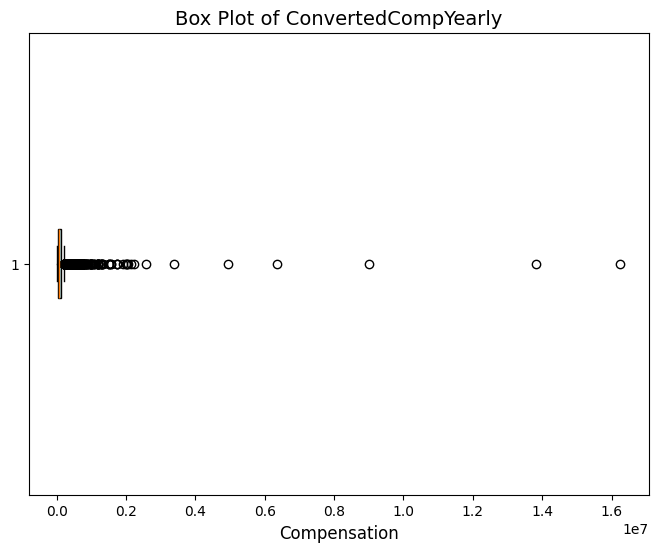

Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.97308629757
Threshold for Outliers: 646426.2065215341
Outliers (3 STD above mean): [650000.0, 1000000.0, 945000.0, 750000.0, 2000000.0, 1000000.0, 800000.0, 1302817.0, 1031099.0, 650000.0, 750000.0, 1052581.0, 1728025.0, 1074062.0, 1500000.0, 950000.0, 1184707.0, 798000.0, 1188001.0, 1000000.0, 1273879.0, 1332930.0, 13818022.0, 700000.0, 660660.0, 1000000.0, 803285.0, 1500000.0, 2048046.0, 670000.0, 859250.0, 1750749.0, 750000.0, 740517.0, 750000.0, 16256603.0, 1550391.0, 800000.0, 700000.0, 6340564.0, 4936778.0, 1000000.0, 1200000.0, 875000.0, 750000.0, 1200000.0, 3367716.0, 750000.0, 1562898.0, 750000.0, 2014062.0, 750000.0, 713372.0, 2584118.0, 750000.0, 700000.0, 764327.0, 1250348.0, 912953.0, 810000.0, 750000.0, 1295242.0, 2000000.0, 650000.0, 1200000.0, 9000000.0, 650000.0, 980887.0, 850000.0, 720000.0, 675000.0, 1750000.0, 712801.0, 1074062.0, 2237846.0, 1200000.0, 1500000.0, 2153432.0, 1188001.0, 1140481.0, 1900

In [8]:
##Write your code here


comp_data = df['ConvertedCompYearly']

# Calculate mean, median, and standard deviation
mean_comp = comp_data.mean()
median_comp = comp_data.median()
std_comp = comp_data.std()

# Define threshold for outliers (3 standard deviations above the mean)
threshold = mean_comp + 3 * std_comp

# Identify compensation values exceeding the threshold
outliers = comp_data[comp_data > threshold]

# Calculate the Interquartile Range (IQR)
q1 = comp_data.quantile(0.25)
q3 = comp_data.quantile(0.75)
iqr = q3 - q1

# Determine the upper and lower bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count outliers based on IQR
iqr_outliers = comp_data[(comp_data < lower_bound) | (comp_data > upper_bound)]

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(comp_data.dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Box Plot of ConvertedCompYearly", fontsize=14)
plt.xlabel("Compensation", fontsize=12)
plt.show()

# Display results
print(f"Mean: {mean_comp}")
print(f"Median: {median_comp}")
print(f"Standard Deviation: {std_comp}")
print(f"Threshold for Outliers: {threshold}")
print(f"Outliers (3 STD above mean): {outliers.tolist()}")
print(f"IQR: {iqr}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Outliers (based on IQR): {iqr_outliers.tolist()}")

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [9]:
##Write your code here

cleaned_data = df[(comp_data >= lower_bound) & (comp_data <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame Size: {df.shape}")
print(f"Cleaned DataFrame Size: {cleaned_data.shape}")

Original DataFrame Size: (65437, 114)
Cleaned DataFrame Size: (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


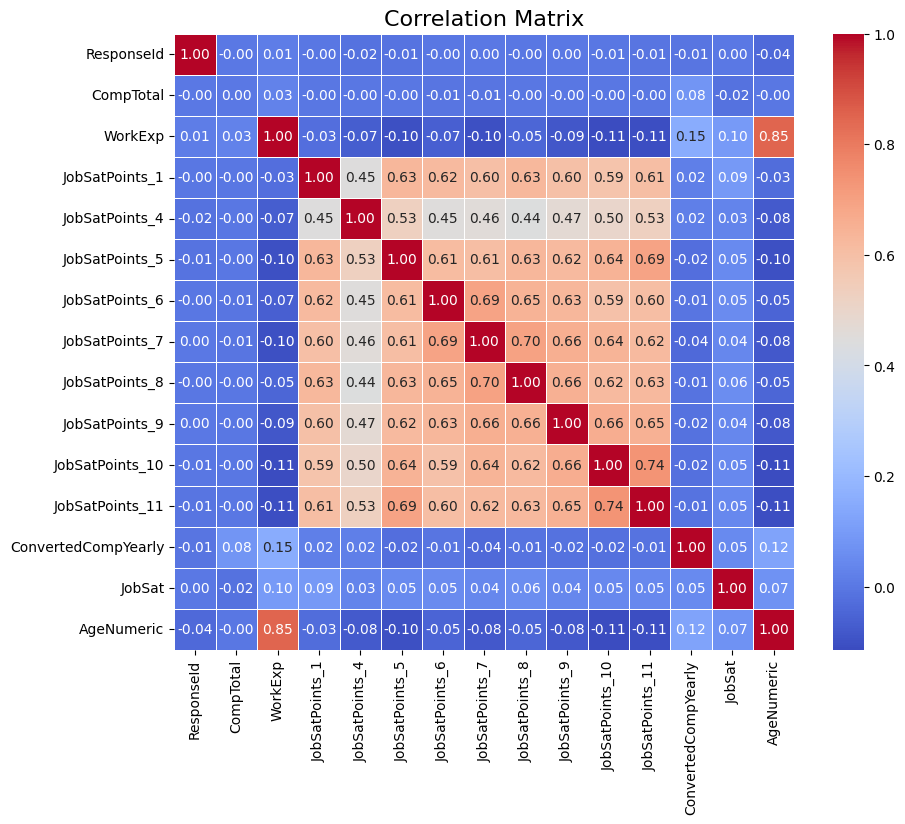

Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.97308629757
Threshold for Outliers: 646426.2065215341
Outliers (3 STD above mean): [650000.0, 1000000.0, 945000.0, 750000.0, 2000000.0, 1000000.0, 800000.0, 1302817.0, 1031099.0, 650000.0, 750000.0, 1052581.0, 1728025.0, 1074062.0, 1500000.0, 950000.0, 1184707.0, 798000.0, 1188001.0, 1000000.0, 1273879.0, 1332930.0, 13818022.0, 700000.0, 660660.0, 1000000.0, 803285.0, 1500000.0, 2048046.0, 670000.0, 859250.0, 1750749.0, 750000.0, 740517.0, 750000.0, 16256603.0, 1550391.0, 800000.0, 700000.0, 6340564.0, 4936778.0, 1000000.0, 1200000.0, 875000.0, 750000.0, 1200000.0, 3367716.0, 750000.0, 1562898.0, 750000.0, 2014062.0, 750000.0, 713372.0, 2584118.0, 750000.0, 700000.0, 764327.0, 1250348.0, 912953.0, 810000.0, 750000.0, 1295242.0, 2000000.0, 650000.0, 1200000.0, 9000000.0, 650000.0, 980887.0, 850000.0, 720000.0, 675000.0, 1750000.0, 712801.0, 1074062.0, 2237846.0, 1200000.0, 1500000.0, 2153432.0, 1188001.0, 1140481.0, 1900

In [11]:
##Write your code here

!pip install numpy
import numpy as np
# Map the Age column to approximate numeric values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Compute correlations between Age and other numeric variables
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# Display results
print(f"Mean: {mean_comp}")
print(f"Median: {median_comp}")
print(f"Standard Deviation: {std_comp}")
print(f"Threshold for Outliers: {threshold}")
print(f"Outliers (3 STD above mean): {outliers.tolist()}")
print(f"IQR: {iqr}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Outliers (based on IQR): {iqr_outliers.tolist()}")

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
